In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
cols = [x + 1 for x in range(60)] + ["class"]
df = pd.read_csv("sonar.csv", names=cols)
df["class"] = df["class"].astype('category').cat.codes
df.head()

,1,2,3,4,5,6,7,8,9,10,...,52,53,54,55,56,57,58,59,60,class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1


<AxesSubplot: >

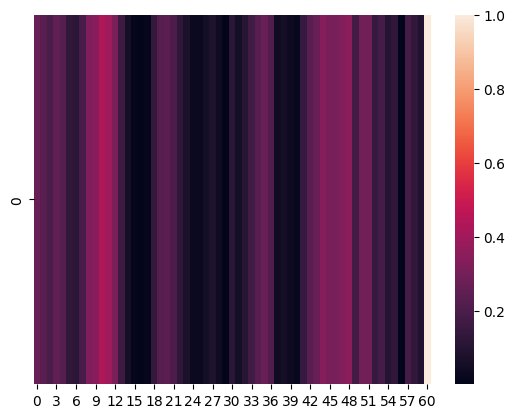

In [5]:
corr = df.corr()
# sns.heatmap(corr)
corr = corr['class'].abs()
sns.heatmap([corr])

In [6]:
c = df.corr()['class'].abs()

c = c.drop('class')
s = c.sort_values(ascending=False)
num_features = 10
feature_columns = list(s[:num_features + 1].index)

complete_df = df[feature_columns + ['class']]

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

model = MLPClassifier(max_iter=10000, hidden_layer_sizes=(200,))
scores = []
for _ in range(10):
    train_df, test_df = train_test_split(complete_df, train_size=0.75)
    train_feature_df = train_df.drop("class", axis='columns')
    train_class_df = train_df["class"]

    model.fit(train_feature_df, train_class_df)

    test_feature_df = test_df.drop("class", axis='columns')
    test_class_df = test_df["class"]
    score = model.score(test_feature_df, test_class_df)
    scores.append(score)
    print(score)

print(f"Average score: {100*sum(scores)/len(scores):.2f}%")



0.6730769230769231
0.6346153846153846
0.7307692307692307
0.7307692307692307
0.7115384615384616
0.75
0.7307692307692307
0.6923076923076923
0.75
0.8076923076923077
Average score: 72.12%


In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import math

#Built this on top of Nafi's previous work. Hoping to streamline doing quick testing with different feature selections.


class colour:
   BOLD = '\033[1m'
   END = '\033[0m'

#this does some basic printing of the data and calculates the mean and standard deviation (i think, maths is not my thing)
#type string is just a string for printing the correct name for the print
#scores is a python list or scores the next function returns to.
def score_printer(type_string, scores):
    print(colour.BOLD + type_string + " model:" + colour.END)
    sum = 0
    len = 0
    for x in scores:
        print(x, end = "    ")
        len += 1
        sum += x
    print("")
    print("")
    print(colour.BOLD + "Mean:" + colour.END)
    mean = sum/len
    print(mean)
    
    deviation = 0
    for x in scores:
        deviation += (mean - x)**2
        
    print("")
    print(colour.BOLD + "Standard deviation:" + colour.END)
    std_dev = math.sqrt(deviation/len)
    print(std_dev)
    print("")

#Dictionary of dictionary to hold the models.
#Put new models in here.

#copy paste this to put in as arg to get dictionary: model['TYPE_OF_MODEL']['KEY_1_-_n']

model = {}
model['per'] = {}
model['log'] = {}
model['gau'] = {}
model['knr'] = {}
model['knw'] = {}
model['rfc'] = {}

model['per']['1'] = MLPClassifier(max_iter=10000, hidden_layer_sizes=(200,))
model['log']['1'] = LogisticRegression(max_iter = 10000).fit(train_feature_df, train_class_df)
model['gau']['1'] = GaussianNB()
model['knr']['1'] = KNeighborsClassifier(n_neighbors=5)
model['knw']['1'] = KNeighborsClassifier(n_neighbors=5, weights = 'distance')
model['rfc']['1'] = clf=RandomForestClassifier(n_estimators=777)

#this will return the accuracy from a model, you just put the type of model as a dictionary entry 
#and then train data and test data

def get_acc(model, train_data, test_data):
    train_feature_df = train_df.drop("class", axis='columns')
    train_class_df = train_df["class"]
        
    model.fit(train_feature_df, train_class_df)
    
    test_feature_df = test_df.drop("class", axis='columns')
    test_class_df = test_df["class"]
    score = model.score(test_feature_df, test_class_df)
    return score

#Picking the number of features from the list ordered by most correlating in the heatmap.
num_features = 25

#Setting the columns for the features.
feature_columns = list(s[:num_features + 1].index)

#Setting the column for the classifier.
complete_df = df[feature_columns + ['class']]


#Defining the needed list to feed the accuracies into.
scores_logreg = []
scores_perc = []
scores_gaus = []
scores_knear = []
scores_knearw = []
scores_rforc = []

print("Working", end = "" )
for _ in range(10):
    train_df, test_df = train_test_split(complete_df, train_size=0.75, random_state = None)
    
    #Score value will return from the function. Append it to the list.
    score = get_acc(model['per']['1'], train_df, test_df)
    scores_perc.append(score)
    
    score = get_acc(model['log']['1'], train_df, test_df)
    scores_logreg.append(score)
    
    score = get_acc(model['gau']['1'], train_df, test_df)
    scores_gaus.append(score)
    
    score = get_acc(model['knr']['1'], train_df, test_df)
    scores_knear.append(score)
    
    score = get_acc(model['knw']['1'], train_df, test_df)
    scores_knearw.append(score)
    
    score = get_acc(model['rfc']['1'], train_df, test_df)
    scores_rforc.append(score)
    
    print(".", end = "")
    
print("")
print("")
#Runt he lists through the score printer.
score_printer("Perceptron", scores_perc)
score_printer("Logistic Regression", scores_logreg)
score_printer("Gaussian", scores_gaus)
score_printer("k nearest", scores_knear)
score_printer("k nearest weighted", scores_knearw)
score_printer("random forest classifier", scores_rforc)



Working..........

Perceptron model:
0.8269230769230769    0.7692307692307693    0.7692307692307693    0.8461538461538461    0.7115384615384616    0.7307692307692307    0.6538461538461539    0.8653846153846154    0.8846153846153846    0.8076923076923077    

Mean:
0.7865384615384616

Standard deviation:
0.06957712505817516

Logistic Regression model:
0.8269230769230769    0.6730769230769231    0.75    0.8076923076923077    0.7884615384615384    0.7307692307692307    0.75    0.8076923076923077    0.7115384615384616    0.7307692307692307    

Mean:
0.7576923076923077

Standard deviation:
0.046473253744594496

Gaussian model:
0.7115384615384616    0.6153846153846154    0.6346153846153846    0.7307692307692307    0.6730769230769231    0.6538461538461539    0.6346153846153846    0.6346153846153846    0.6923076923076923    0.6730769230769231    

Mean:
0.6653846153846156

Standard deviation:
0.03566776344421425

k nearest model:
0.7115384615384616    0.7307692307692307    0.8269230769230769 

In [55]:
from sklearn.metrics import confusion_matrix

def get_confusion_matrix(model, train_df, test_df):
    train_feature_df = train_df.drop("class", axis='columns')
    train_class_df = train_df["class"]
        
    model.fit(train_feature_df, train_class_df)
    
    test_feature_df = test_df.drop("class", axis='columns')
    test_class_df = test_df["class"]
    
    predY = model.predict(test_feature_df)
    out = confusion_matrix(predY, test_class_df, normalize='all')
    labels = ['True Neg','False Pos','False Neg','True Pos']
    labels = np.asarray(labels).reshape(2,2)
    #sns.heatmap(out, annot=True, cmap='Blues')
    return out

def add_to_conf_matrix(model_name, conf_dict, matrix):
    if isinstance(conf_dict[model_name], list):
        conf_dict[model_name] = matrix
    else:
        conf_dict[model_name] = np.add(conf_dict[model_name], matrix)  

conf_dict = {
    "MLP":[],
    "Logistic Regression":[],
    "Guassian":[],
    "K-Nearest Neighbour":[],
    "K-Nearest Weighted":[],
    "Random Forest":[]
}

for _ in range(10):
    train_df, test_df = train_test_split(complete_df, train_size=0.75, random_state = None)
    
    #Score value will return from the function. Append it to the list.
    score = get_confusion_matrix(model['per']['1'], train_df, test_df)
    add_to_conf_matrix("MLP", conf_dict, score)
    
    score = get_confusion_matrix(model['log']['1'], train_df, test_df)
    add_to_conf_matrix("Logistic Regression", conf_dict, score)
    
    score = get_confusion_matrix(model['gau']['1'], train_df, test_df)
    add_to_conf_matrix("Guassian", conf_dict, score)
    
    score = get_confusion_matrix(model['knr']['1'], train_df, test_df)
    add_to_conf_matrix("K-Nearest Neighbour", conf_dict, score)
    
    score = get_confusion_matrix(model['knw']['1'], train_df, test_df)
    add_to_conf_matrix("K-Nearest Weighted", conf_dict, score)
    
    score = get_confusion_matrix(model['rfc']['1'], train_df, test_df)
    add_to_conf_matrix("Random Forest", conf_dict, score)
    
    print(".", end = "")




..........

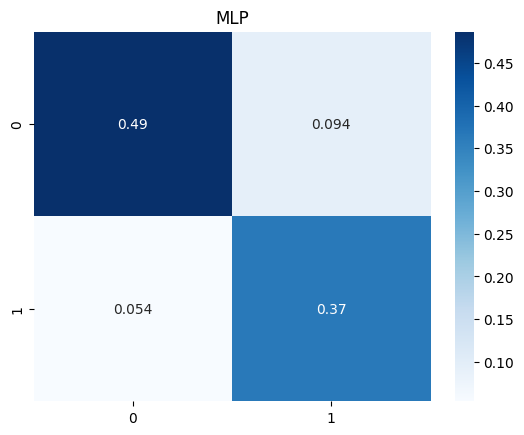

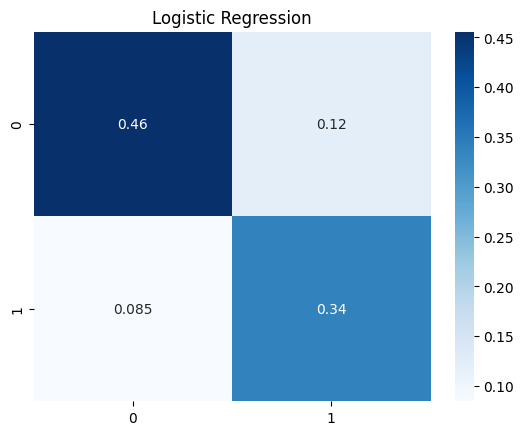

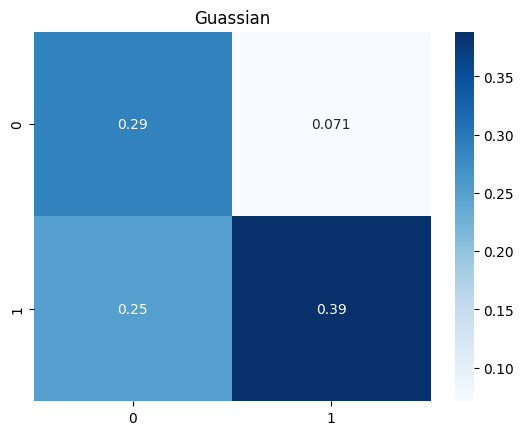

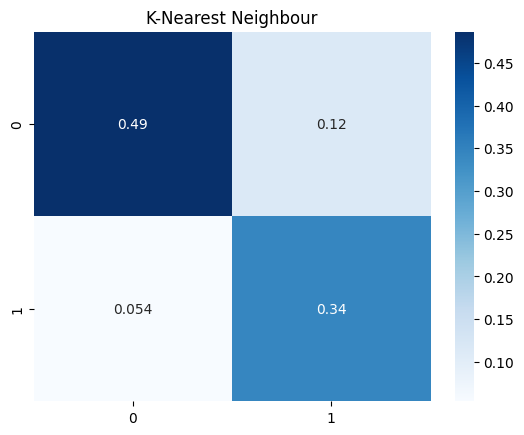

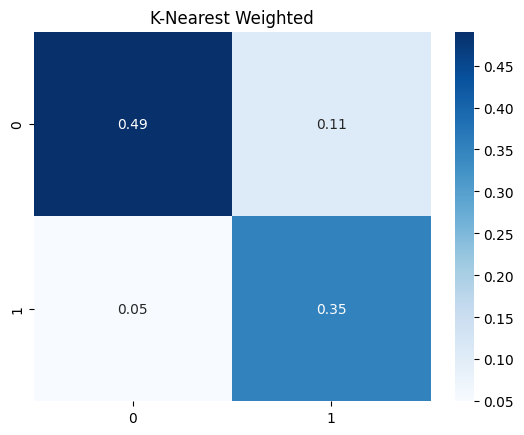

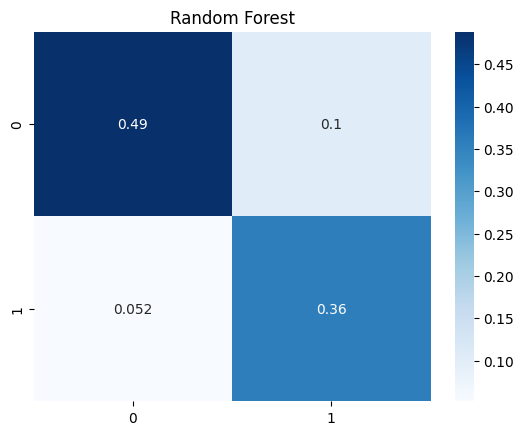

In [57]:
for model_name, matrix in conf_dict.items():
    matrix = matrix / 10
    sns.heatmap(matrix, annot=True, cmap='Blues')
    plt.title(model_name)
    plt.show()


In [18]:
num_features = 24
feature_columns = list(s[:num_features + 1].index)

complete_df = df[feature_columns + ['class']]

scores_logreg = []
scores_perc = []
scores_gaus = []
scores_knear = []
scores_knear_w = []


print("Working", end = "" )
for _ in range(100):
    train_df, test_df = train_test_split(complete_df, train_size=0.75, random_state = None)
    
    score = get_acc(1, train_df, test_df)
    scores_perc.append(score)
    
    score = get_acc(2, train_df, test_df)
    scores_logreg.append(score)
    
    score = get_acc(3, train_df, test_df)
    scores_gaus.append(score)
    
    score = get_acc(4, train_df, test_df)
    scores_knear.append(score)
    
    score = get_acc(5, train_df, test_df)
    scores_knear_w.append(score)
    
    print(".", end = "")
    
print("")
print("")
score_printer("Perceptron", scores_perc)
score_printer("Logistic Regression", scores_logreg)
score_printer("Gaussian", scores_gaus)
score_printer("k nearest", scores_knear)
score_printer("k nearest weighted", scores_knear_w)

Working....................................................................................................

Perceptron model:
0.7884615384615384    0.8076923076923077    0.8653846153846154    0.7307692307692307    0.7884615384615384    0.7692307692307693    0.7115384615384616    0.6730769230769231    0.7884615384615384    0.6923076923076923    0.8076923076923077    0.7884615384615384    0.7692307692307693    0.7307692307692307    0.7692307692307693    0.7884615384615384    0.8269230769230769    0.7692307692307693    0.8076923076923077    0.75    0.8846153846153846    0.7692307692307693    0.75    0.7884615384615384    0.7884615384615384    0.8076923076923077    0.7307692307692307    0.7692307692307693    0.7307692307692307    0.7307692307692307    0.8846153846153846    0.7692307692307693    0.7884615384615384    0.8653846153846154    0.8269230769230769    0.8076923076923077    0.8846153846153846    0.8269230769230769    0.8076923076923077    0.8076923076923077    0.6346153846153846   

In [19]:
num_features = 25
feature_columns = list(s[:num_features + 1].index)

complete_df = df[feature_columns + ['class']]

scores_logreg = []
scores_perc = []
scores_gaus = []
scores_knear = []
scores_knear_w = []

print("Working", end = "" )
for _ in range(100):
    train_df, test_df = train_test_split(complete_df, train_size=0.75, random_state = None)
    
    score = get_acc(1, train_df, test_df)
    scores_perc.append(score)
    
    score = get_acc(2, train_df, test_df)
    scores_logreg.append(score)
    
    score = get_acc(3, train_df, test_df)
    scores_gaus.append(score)
    
    score = get_acc(4, train_df, test_df)
    scores_knear.append(score)
    
    score = get_acc(5, train_df, test_df)
    scores_knear_w.append(score)
    
    print(".", end = "")
    
print("")
print("")
score_printer("Perceptron", scores_perc)
score_printer("Logistic Regression", scores_logreg)
score_printer("Gaussian", scores_gaus)
score_printer("k nearest", scores_knear)
score_printer("k nearest weighted", scores_knear_w)

Working....................................................................................................

Perceptron model:
0.8076923076923077    0.7884615384615384    0.75    0.6730769230769231    0.6923076923076923    0.7692307692307693    0.8461538461538461    0.7692307692307693    0.8269230769230769    0.8076923076923077    0.7884615384615384    0.8461538461538461    0.9038461538461539    0.75    0.7692307692307693    0.8461538461538461    0.8269230769230769    0.8461538461538461    0.8846153846153846    0.8653846153846154    0.7692307692307693    0.8461538461538461    0.7115384615384616    0.7307692307692307    0.7884615384615384    0.7884615384615384    0.8846153846153846    0.7307692307692307    0.8076923076923077    0.8269230769230769    0.8269230769230769    0.75    0.7307692307692307    0.8846153846153846    0.8269230769230769    0.75    0.7884615384615384    0.9230769230769231    0.7692307692307693    0.7307692307692307    0.7884615384615384    0.8461538461538461    0.846

In [20]:
num_features = 26
feature_columns = list(s[:num_features + 1].index)

complete_df = df[feature_columns + ['class']]

scores_logreg = []
scores_perc = []
scores_gaus = []
scores_knear = []
scores_knear_w = []

print("Working", end = "" )
for _ in range(100):
    train_df, test_df = train_test_split(complete_df, train_size=0.75, random_state = None)
    
    score = get_acc(1, train_df, test_df)
    scores_perc.append(score)
    
    score = get_acc(2, train_df, test_df)
    scores_logreg.append(score)
    
    score = get_acc(3, train_df, test_df)
    scores_gaus.append(score)
    
    score = get_acc(4, train_df, test_df)
    scores_knear.append(score)
    
    score = get_acc(5, train_df, test_df)
    scores_knear_w.append(score)
    
    print(".", end = "")
    
print("")
print("")
score_printer("Perceptron", scores_perc)
score_printer("Logistic Regression", scores_logreg)
score_printer("Gaussian", scores_gaus)
score_printer("k nearest", scores_knear)
score_printer("k nearest weighted", scores_knear_w)

Working....................................................................................................

Perceptron model:
0.7692307692307693    0.8076923076923077    0.7115384615384616    0.8076923076923077    0.8269230769230769    0.7692307692307693    0.8653846153846154    0.8269230769230769    0.7307692307692307    0.8269230769230769    0.8461538461538461    0.8269230769230769    0.8269230769230769    0.7115384615384616    0.7692307692307693    0.7884615384615384    0.7884615384615384    0.7115384615384616    0.7307692307692307    0.9230769230769231    0.7692307692307693    0.7307692307692307    0.8653846153846154    0.8076923076923077    0.8461538461538461    0.8461538461538461    0.8076923076923077    0.8076923076923077    0.8653846153846154    0.8653846153846154    0.7692307692307693    0.8461538461538461    0.7692307692307693    0.8076923076923077    0.7307692307692307    0.8653846153846154    0.7307692307692307    0.8076923076923077    0.7884615384615384    0.8269230769230